## IPL Analysis

##### Importing library 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path=r"D:\my_git\ipl_2025_analysis\data\ipl_2025_deliveries.csv"

In [5]:
df=pd.read_csv(path)

In [6]:
df.describe()

,match_id,season,match_no,innings,over,runs_of_bat,extras,wide,legbyes,byes,noballs
count,17246.000000,17246.0,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000
mean,202537.187232,2025.0,37.187232,1.473733,9.480314,1.467935,0.068248,0.038212,0.012061,0.001566,0.004001
std,21.458575,0.0,21.458575,0.501410,5.650300,1.810856,0.336843,0.191713,0.109160,0.039538,0.063128
min,202501.000000,2025.0,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202519.000000,2025.0,19.000000,1.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202537.000000,2025.0,37.000000,1.000000,9.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202556.000000,2025.0,56.000000,2.000000,14.300000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202574.000000,2025.0,74.000000,4.000000,19.600000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.head(3)

,match_id,season,phase,match_no,date,venue,batting_team,bowling_team,innings,over,...,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.1,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.2,...,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.3,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN


In [8]:
df.columns

Index(['match_id', 'season', 'phase', 'match_no', 'date', 'venue',
       'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler',
       'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs',
       'wicket_type', 'player_dismissed', 'fielder'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17246 entries, 0 to 17245
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17246 non-null  int64  
 1   season            17246 non-null  int64  
 2   phase             17246 non-null  object 
 3   match_no          17246 non-null  int64  
 4   date              17246 non-null  object 
 5   venue             17246 non-null  object 
 6   batting_team      17246 non-null  object 
 7   bowling_team      17246 non-null  object 
 8   innings           17246 non-null  int64  
 9   over              17246 non-null  float64
 10  striker           17246 non-null  object 
 11  bowler            17246 non-null  object 
 12  runs_of_bat       17246 non-null  int64  
 13  extras            17246 non-null  int64  
 14  wide              17246 non-null  int64  
 15  legbyes           17246 non-null  int64  
 16  byes              17246 non-null  int64 

In [10]:
df.isnull().sum()

match_id                0
season                  0
phase                   0
match_no                0
date                    0
venue                   0
batting_team            0
bowling_team            0
innings                 0
over                    0
striker                 0
bowler                  0
runs_of_bat             0
extras                  0
wide                    0
legbyes                 0
byes                    0
noballs                 0
wicket_type         16373
player_dismissed    16373
fielder             16566
dtype: int64

#### Maximum run by batsman and ball faced 

In [355]:
max_run=df.groupby("striker")['runs_of_bat'].sum()
ball_faced=df.groupby("striker")['runs_of_bat'].count()


In [358]:
max_run=pd.DataFrame(max_run)
ball_faced=pd.DataFrame(ball_faced)

In [361]:

ball_faced=ball_faced.rename(columns={'runs_of_bat':'ball_faced'})
max_run = max_run.rename(columns={'runs_of_bat': 'total_runs'})

In [362]:

max_run=max_run.sort_values(by="total_runs",ascending=False)

ball_faced=ball_faced.sort_values(by='ball_faced',ascending=False)

In [363]:
ball_faced

,ball_faced
striker,
Sai Sudharsan,509
Kohli,466
Suryakumar Yadav,439
Shubman Gill,432
Mitchell Marsh,400
...,...
Ferguson,1
Livingstone 1 run,1
Karn Sharma,1


In [364]:
pd.concat([max_run, ball_faced],axis=1).head(10)

,total_runs,ball_faced
striker,,
Sai Sudharsan,759,509
Suryakumar Yadav,717,439
Kohli,657,466
Shubman Gill,650,432
Mitchell Marsh,627,400
Shreyas Iyer,604,359
Prabhsimran,599,376
Jaiswal,559,358
Rahul,546,369


C:\Users\briyani\AppData\Local\Temp\ipykernel_32192\2461841659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_run, x="striker",y="runs_of_bat",palette="viridis")


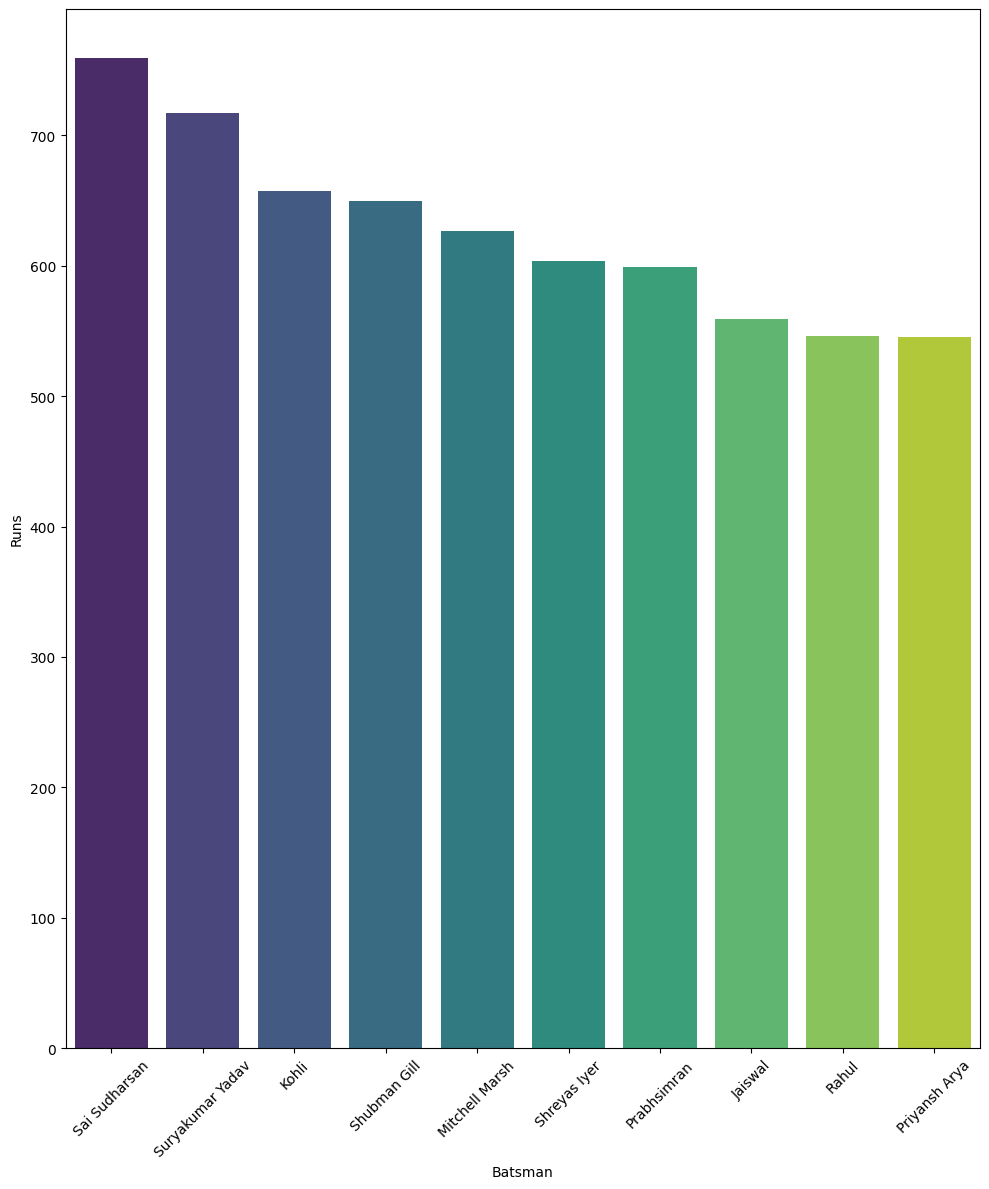

In [285]:
plt.figure(figsize=(10,12))
sns.barplot(data=top_run, x="striker",y="runs_of_bat",palette="viridis")
plt.xlabel("Batsman")
plt.xticks(rotation=45)
plt.ylabel("Runs")
plt.tight_layout()
plt.show()

#### Maximum wide 

In [16]:
max_wide=df.groupby("bowler")["wide"].sum()

In [17]:
max_wide=pd.DataFrame(max_wide).sort_values(by="wide",ascending=False)

In [18]:
max_wide.head()

,wide
bowler,
Pathirana,32
Siraj,22
Tushar Deshpande,19
Sandeep Sharma,17
Harshal Patel,17


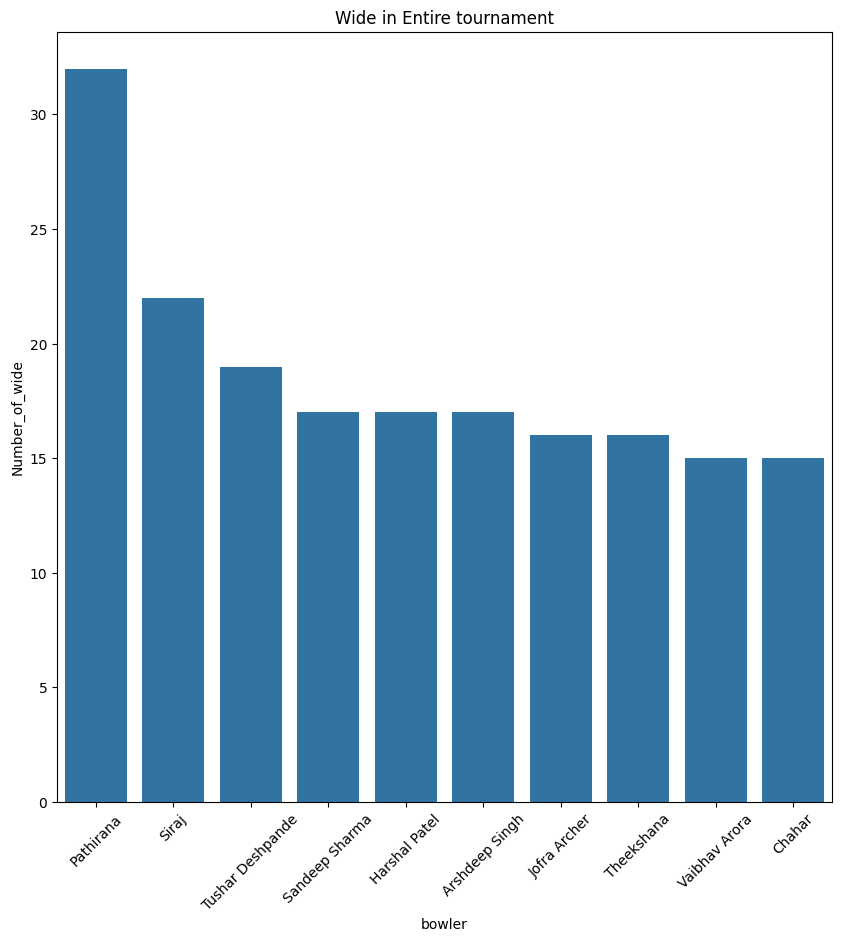

In [19]:
plt.figure(figsize=(10,10))
sns.barplot(data=max_wide.head(10),x="bowler",y="wide")
plt.title("Wide in Entire tournament")
plt.xlabel("bowler")
plt.ylabel("Number_of_wide")
plt.xticks(rotation=45)
plt.show()

#### CSK 

In [20]:
df["bowling_team"].unique()

array(['RCB', 'KKR', 'RR', 'SRH', 'CSK', 'MI', 'DC', 'LSG', 'GT', 'PBKS'],
      dtype=object)

In [21]:
csk=df[df["bowling_team"]=="CSK"]

In [22]:
csk_max_wide=pd.DataFrame(csk.groupby("bowler")["wide"].sum()).sort_values(by="wide",ascending=False)

In [23]:
csk_max_wide.head(10)

,wide
bowler,
Pathirana,32
Noor Ahmad,11
Khaleel Ahmed,7
Jamie Overton,4
Ashwin,3
Jadeja,3
Sam Curran,2
Hooda,1
Nathan Ellis,1


In [24]:
csk_bat=df[df["batting_team"]=="CSK"]
csk_run=pd.DataFrame(csk_bat.groupby("striker")["runs_of_bat"].sum()).sort_values(by="runs_of_bat",ascending=False)

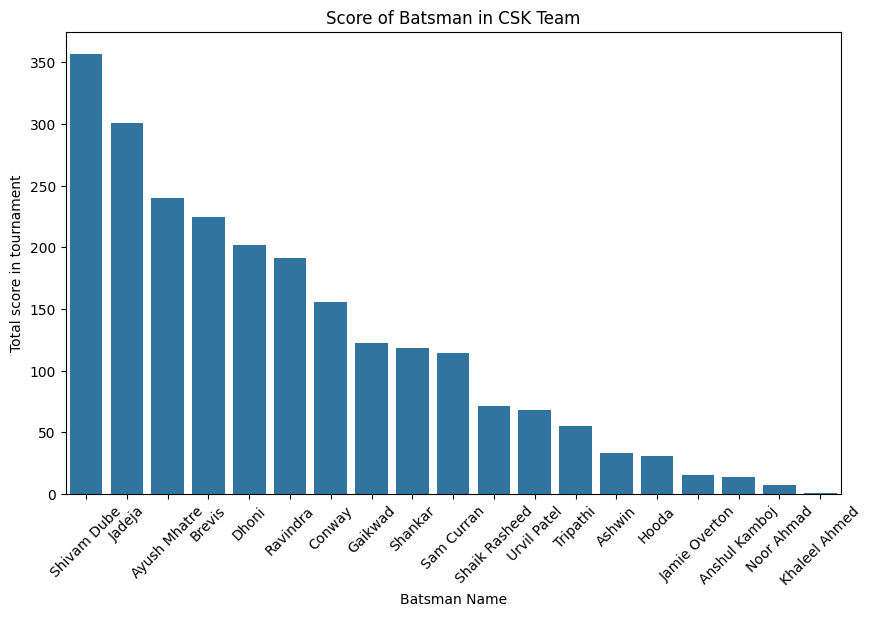

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=csk_run,x="striker",y="runs_of_bat")
plt.title("Score of Batsman in CSK Team")
plt.xticks(rotation=45)
plt.xlabel("Batsman Name")
plt.ylabel('Total score in tournament')
plt.show()


In [26]:
csk_wickets=df[(df["bowling_team"]=="CSK") & (df['player_dismissed'].notnull())]

In [27]:
csk_bowler_wicket=pd.DataFrame(csk_wickets.groupby("bowler")['player_dismissed'].count())

In [28]:
csk_bowler_wicket.rename(columns={'player_dismissed': 'wickets'}, inplace=True)
csk_bowler_wicket=csk_bowler_wicket.sort_values(by='wickets',ascending=False)


In [29]:
csk_bowler_wicket.head(10)

,wickets
bowler,
Noor Ahmad,24
Khaleel Ahmed,16
Pathirana,15
Jadeja,10
Anshul Kamboj,8
Ashwin,7
Mukesh Choudhary,1
Nathan Ellis,1
Sam Curran,1


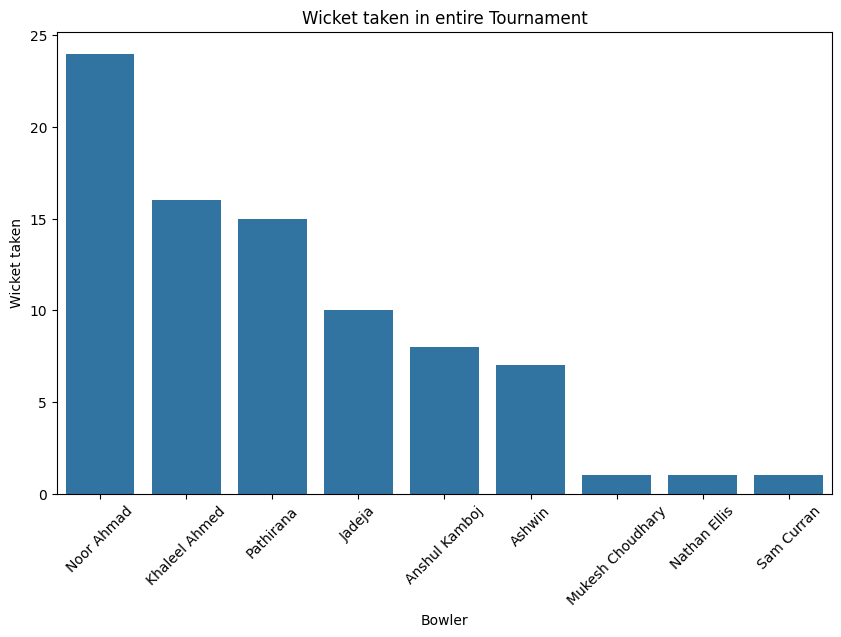

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=csk_bowler_wicket,x="bowler",y='wickets')
plt.xticks(rotation=45)
plt.xlabel('Bowler')
plt.ylabel("Wicket taken")
plt.title("Wicket taken in entire Tournament")
plt.show()


##### Each Team total score 

In [40]:
df['total_run']=df['runs_of_bat']+df['extras']
team_total=df.groupby('batting_team')['total_run'].sum()

In [41]:
team_total=pd.DataFrame(team_total).sort_values(by='total_run',ascending=False)


In [183]:
team_colors = {
    'RCB': '#D50032',
    'KKR': '#4B2153',
    'RR': '#004C93',
    'SRH': '#F05A28',
    'CSK': '#FAD201',
    'MI': '#004BA0',
    'DC': '#004C93',
    'LSG': '#F5D547',
    'GT': '#008080',
    'PBKS': '#E41D44'
}

C:\Users\briyani\AppData\Local\Temp\ipykernel_32192\2376971985.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(data=team_total,x="batting_team",y='total_run',palette=team_colors)


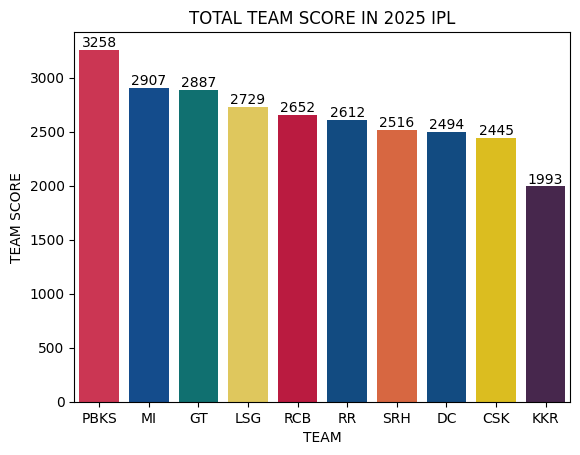

In [43]:
barplot=sns.barplot(data=team_total,x="batting_team",y='total_run',palette=team_colors)
for bar in barplot.patches:
    barplot.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),                   
        int(bar.get_height()),               
        ha='center',                        
        va='bottom'                        
    )
plt.xlabel("TEAM")
plt.ylabel("TEAM SCORE")
plt.title("TOTAL TEAM SCORE IN 2025 IPL")
plt.show()

In [149]:
max_noball=pd.DataFrame(df.groupby("bowler")["noballs"].sum()).sort_values(by="noballs",ascending=False)

#### wicket taken by bowlers

In [ ]:
wickets_taken=df[df['player_dismissed'].notnull()]

In [166]:
wickets_by_bowler=pd.DataFrame((wickets_taken.groupby(['bowler','bowling_team'])['player_dismissed']
                   .count())).reset_index().rename(columns={'player_dismissed':'wickets'})


In [167]:
wickets_by_bowler=wickets_by_bowler.sort_values(by='wickets',ascending=False)

In [168]:
top_wicket=wickets_by_bowler.head(10)

In [169]:
top_wicket

,bowler,bowling_team,wickets
69,Prasidh,GT,26
66,Noor Ahmad,CSK,24
15,Boult,MI,23
6,Arshdeep Singh,PBKS,22
32,Hazlewood,RCB,22
16,Bumrah,MI,21
98,Vaibhav Arora,KKR,19
79,Sai Kishore,GT,19
14,Bhuvneshwar,RCB,18
42,Krunal Pandya,RCB,17


In [204]:
top_wicket['team_color']=top_wicket['bowling_team'].map(team_colors)

C:\Users\briyani\AppData\Local\Temp\ipykernel_32192\1668027428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_wicket['team_color']=top_wicket['bowling_team'].map(team_colors)


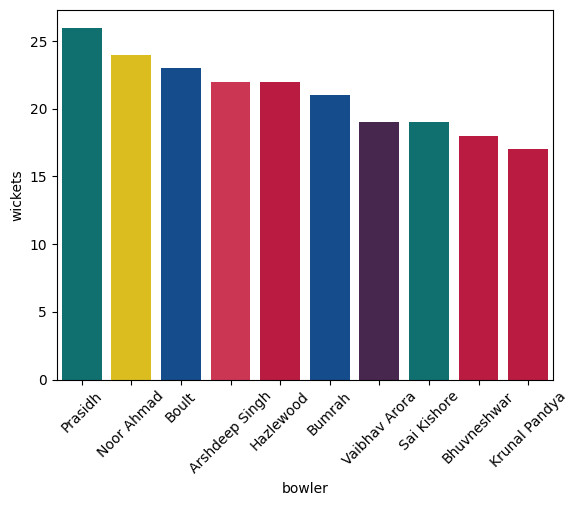

In [203]:

sns.barplot(data=top_wicket.head(10),x="bowler",y="wickets",hue='bowling_team',palette=team_colors)
plt.xticks(rotation=45)
plt.legend().remove()
plt.show()

In [49]:
max_noball

,noballs
bowler,
Harshal Patel,4
Yash Dayal,4
Vipraj Nigam,4
Mitchell Starc,4
Russell,3
...,...
Abhishek Sharma,0
Mukesh Choudhary,0
Mujeeb,0
